In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from myfun import plot_decision_regions
%matplotlib inline

In [2]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

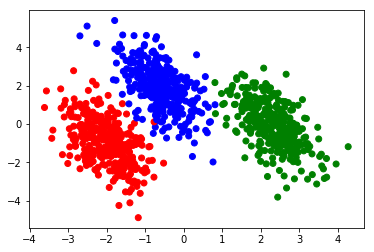

In [3]:
color = "rbg"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)

* LogisticRegression 的參數設定可以參考官方文件
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

training score : 0.995 (multinomial)


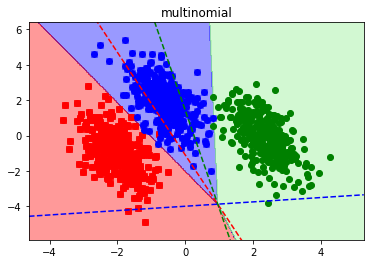

training score : 0.976 (ovr)


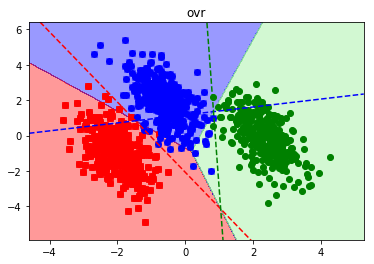

In [4]:
for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag',max_iter=100, random_state=42,multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    
    # plot the decision region
    plt.figure()
    plot_decision_regions(X,y,clf)
    plt.title(multi_class)
    # Plot also the training points
    colors = "rbg"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

    plt.show()

In [5]:
clf.coef_

array([[-4.41615534, -2.23077034],
       [-0.36796618,  1.64022091],
       [ 4.7027708 ,  0.18133443]])

In [6]:
clf.intercept_

array([-4.61020975, -1.91396323, -4.17213317])

In [7]:
clf.classes_

array([0, 1, 2])